## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Data - A1.csv")

In [3]:
df.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


## Task 1: Data preprocessing

In [6]:


x = (df.X).values                                 # extracting feature variable
y = (df.Y).values                                # extracting target values

x_normalized = (x - np.mean(x))/np.std(x)         # normalizing feature variable

split_ratio = 0.8                                 #split ratio 

nos = len(x)                                      #length of data
split_index = int(split_ratio * nos)


# shuffling data

np.random.seed(42)
shuffled = np.random.permutation(nos)
x_shuffled = x_normalized[shuffled]
y_shuffled = y[shuffled]

## Function to create polynomial features

In [7]:
def polynomial_features(x, degree):                  
    return np.column_stack([x**i for i in range(degree + 1)])

      # of degree 9

In [8]:
#dividing in train test dataset

x_train = x_shuffled[:split_index]
y_train = y_shuffled[:split_index]
x_test = x_shuffled[split_index:]
y_test = y_shuffled[split_index:]

## Cost function


In [9]:
def cost_function(x,y,w):
    pred = np.dot(x,w)
    actual = y
    squared_error = np.square(actual- pred)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)

    return root_mean_squared_error
   

def rmse(actual,pred):
    squared_error = (actual- pred)**2
    mean_squared_error = np.mean(squared_error)

    return np.sqrt(mean_squared_error)
    





## gradient descent 

In [10]:
def gradient_descent(x, y, w, lr, epochs):
    cost_values = []

    n = x.shape[0]

    for i in range(epochs):
        

        derivative = -np.dot(x.T,(y - np.dot(x,w) ))/n
        
        #for i in range(x.shape[1]):
            #w[i] = w[i] - lr * (1/n) * np.sum((pred_values - y) * x[:, i])
        w = w - (lr * derivative)
        
        cost_value = cost_function(x, y, w)
        cost_values.append(cost_value)

    return w, cost_values


## learning rate vs cost function for each degree

In [11]:
degree = 9
learning_rates = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
cost_values = [[] for _ in range(degree+1)]



for i in range(1, degree+1):
    a_train = polynomial_features(x_train, i) 
    a_test = polynomial_features(x_test, i) 
    for j in learning_rates:
        w = np.zeros(a_train.shape[1],)
        w_, c_ = gradient_descent(a_train, y_train, w, j, 500)
        c = cost_function(a_train, y_train, w_)
        cost_values[i].append(c)



Text(0.5, 1.0, 'Cost Function vs Learning Rate')

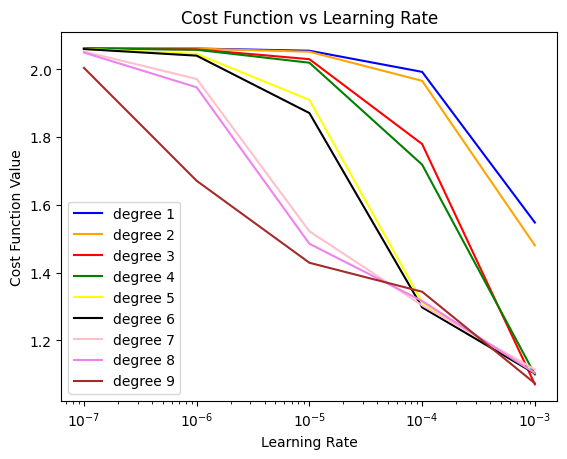

In [12]:
plt.plot(learning_rates, cost_values[1], color='blue',label='degree 1')
plt.plot(learning_rates, cost_values[2], color='orange', label='degree 2')
plt.plot(learning_rates, cost_values[3], color='red', label='degree 3')
plt.plot(learning_rates, cost_values[4], color='green', label='degree 4')
plt.plot(learning_rates, cost_values[5], color='yellow', label='degree 5')
plt.plot(learning_rates, cost_values[6], color='black', label='degree 6')
plt.plot(learning_rates, cost_values[7], color='pink', label='degree 7')
plt.plot(learning_rates, cost_values[8], color='violet', label='degree 8')
plt.plot(learning_rates, cost_values[9], color='brown', label='degree 9')

plt.legend()

plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Learning Rate')

# we can see that best learning rate is 0.001 for each degree 

## plot 

In [13]:
cost_plot_training_degree =[]
cost_plot_test_degree=[]
degree_plot=[]
degrees=9

cost_plot_test_epochs =[]
cost_plot_training_epochs=[]
w_ = []

learning_rate = 0.001    # best learning rate found from above
epochs = 500             

In [14]:
for i in range(degrees+1):
    degree_plot.append(i)
    

    a_train = polynomial_features(x_train,i)
    a_test = polynomial_features(x_test,i)
    
     



    w =np.zeros(a_train.shape[1],)
    

    w_new, cost_new = gradient_descent(a_train, y_train , w,learning_rate,epochs)
    cost_plot_training_epochs.append(cost_new)

    w_.append(w_new)

    y_test_pred = np.dot(a_test,w_new)
    c_test = cost_function(a_test,y_test,w_new)
    cost_plot_test_degree.append(c_test)
    
    
    c_train  = cost_function(a_train,y_train,w_new) 
    cost_plot_training_degree.append(c_train)
    
    
    

In [15]:
degrees=9

cost_plot_test_epochs =[]

learning_rate = 0.001    # best learning rate found from above
epochs = 500             

In [16]:
for i in range(degrees+1):
    
    

    a_train = polynomial_features(x_train,i)
    a_test = polynomial_features(x_test,i)
    
     



    w =np.zeros(a_test.shape[1],)      # declaring all values of w as 0
    

    w_new, cost_new = gradient_descent(a_test, y_test , w,learning_rate,epochs)
    cost_plot_test_epochs.append(cost_new)

    
    
    

## polynomial degree vs error for training data

In [17]:

degree_train_best = np.argmin(cost_plot_training_degree)
degree_test_best = np.argmin(cost_plot_test_degree)

least_error_train = cost_plot_training_degree[np.argmin(cost_plot_training_degree)]
least_error_test = cost_plot_test_degree[np.argmin(cost_plot_test_degree)]

print("training degree with minimum rmse :",degree_train_best," rmse: ",least_error_train)
print("test degree with minimum rmse :",degree_test_best," rmse: ",least_error_test)

training degree with minimum rmse : 3  rmse:  1.0707641403571582
test degree with minimum rmse : 3  rmse:  1.0892786616271155


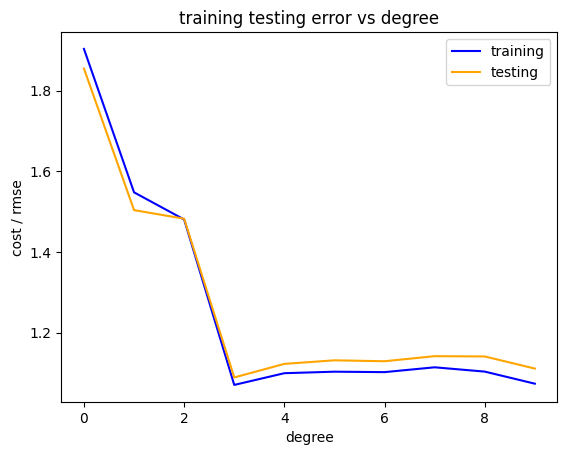

In [18]:
plt.plot(degree_plot, cost_plot_training_degree, color = 'blue', label ='training')
plt.plot(degree_plot, cost_plot_test_degree, color='orange', label='testing')
plt.xlabel("degree")
plt.ylabel("cost / rmse")
plt.title('training testing error vs degree')
plt.legend()

## testing/training error vs epochs 

Text(0.5, 1.0, 'degree 1')

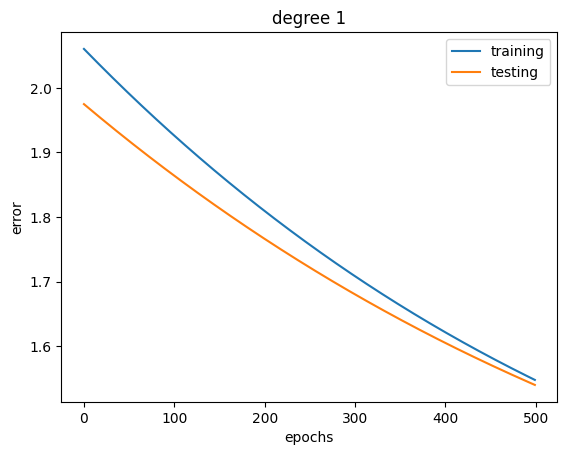

In [19]:
plt.plot(cost_plot_training_epochs[1],label='training')
plt.plot(cost_plot_test_epochs[1],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 1")

Text(0.5, 1.0, 'degree 2')

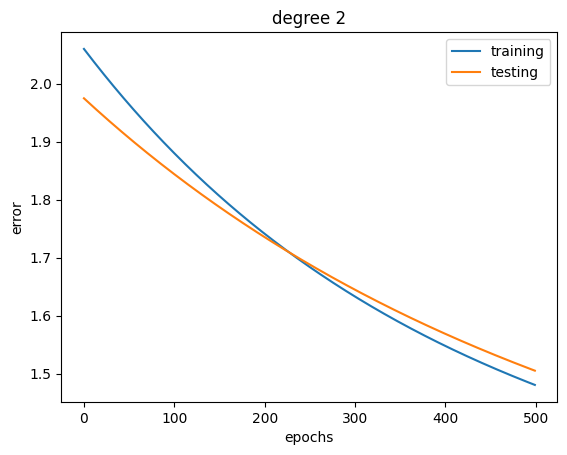

In [20]:
plt.plot(cost_plot_training_epochs[2],label='training')
plt.plot(cost_plot_test_epochs[2],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 2")

Text(0.5, 1.0, 'degree 3')

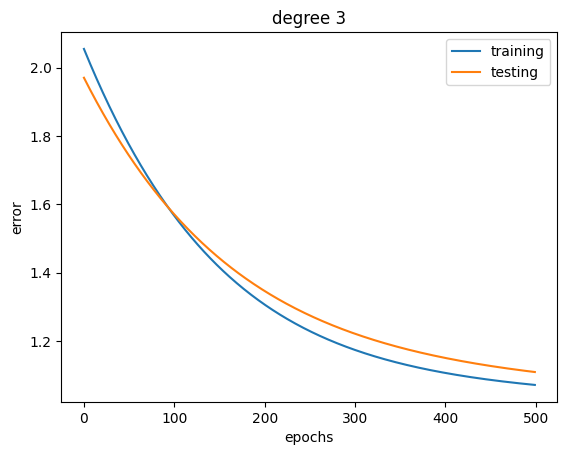

In [21]:
plt.plot(cost_plot_training_epochs[3],label='training')
plt.plot(cost_plot_test_epochs[3],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 3")

Text(0.5, 1.0, 'degree 4')

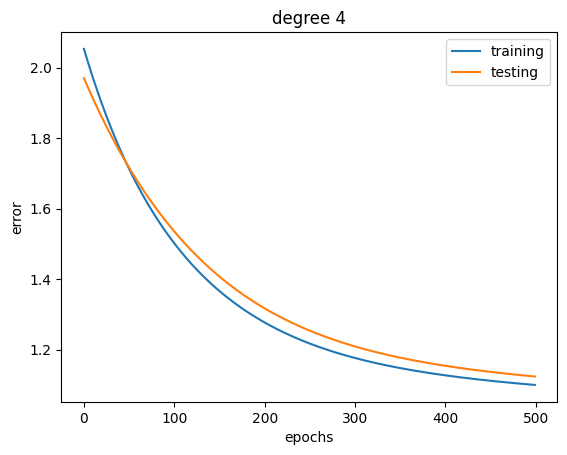

In [22]:
plt.plot(cost_plot_training_epochs[4],label='training')
plt.plot(cost_plot_test_epochs[4],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 4")

Text(0.5, 1.0, 'degree 5')

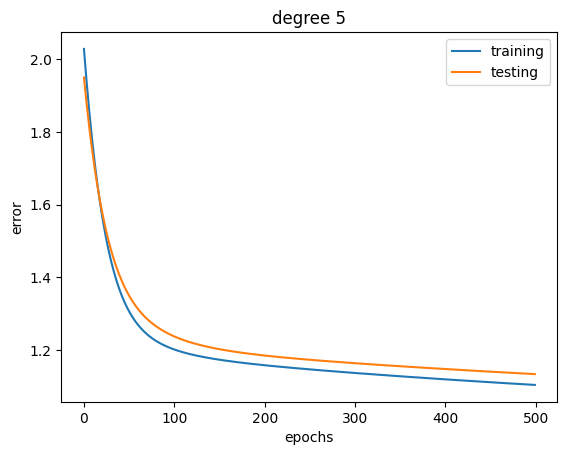

In [23]:
plt.plot(cost_plot_training_epochs[5],label='training')
plt.plot(cost_plot_test_epochs[5],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 5")

Text(0.5, 1.0, 'degree 6')

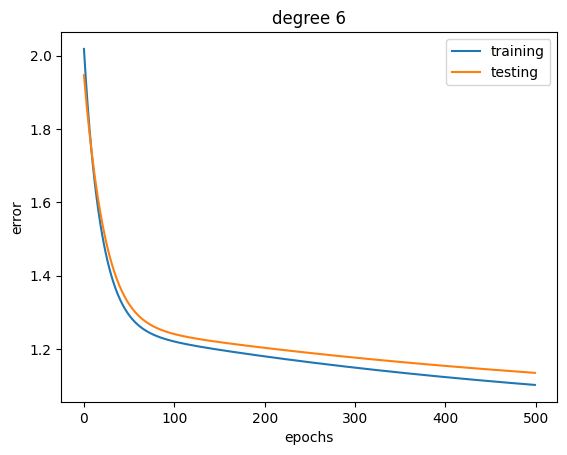

In [24]:
plt.plot(cost_plot_training_epochs[6],label='training')
plt.plot(cost_plot_test_epochs[6],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 6")

Text(0.5, 1.0, 'degree 7')

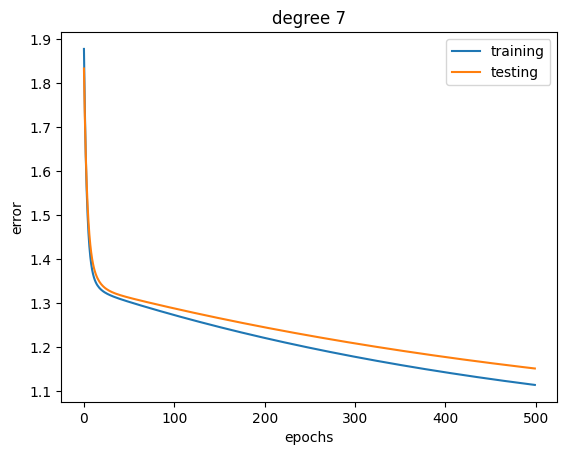

In [25]:
plt.plot(cost_plot_training_epochs[7],label='training')
plt.plot(cost_plot_test_epochs[7],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 7")

Text(0.5, 1.0, 'degree 8')

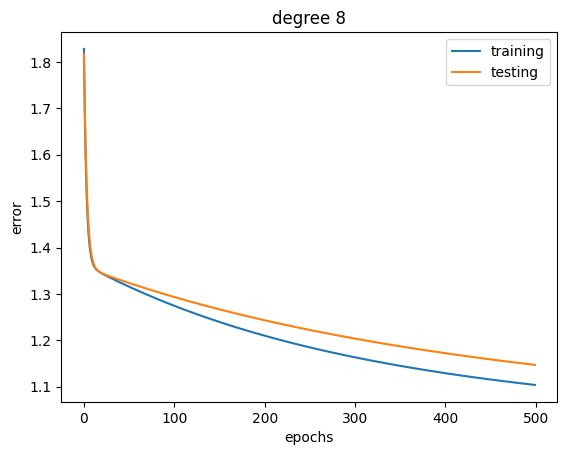

In [26]:
plt.plot(cost_plot_training_epochs[8],label='training')
plt.plot(cost_plot_test_epochs[8],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 8")

Text(0.5, 1.0, 'degree 9')

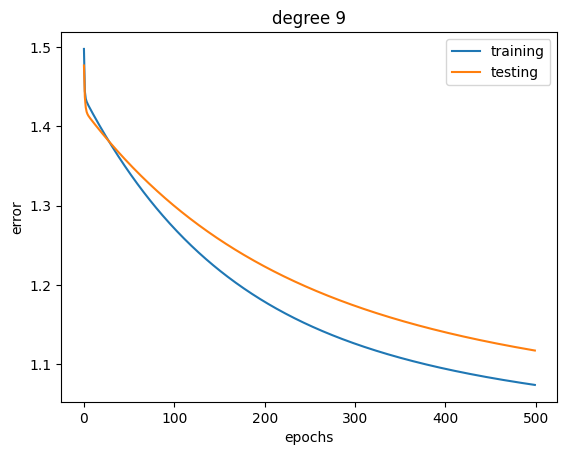

In [27]:
plt.plot(cost_plot_training_epochs[9],label='training')
plt.plot(cost_plot_test_epochs[9],label='testing')
plt.legend()


plt.xlabel("epochs")
plt.ylabel("error")
plt.title("degree 9")

## best fit line

In [28]:
np.random.seed(42)  
random_indices = np.random.choice(len(x), size=100, replace=True)


x_random = x_normalized[random_indices]
y_random = y[random_indices]





In [29]:

w_best = np.array(w_[degree_test_best])

a_random = polynomial_features(x_random, degree_test_best)

w_best.size

y_random_pred = np.dot(a_random, w_best)

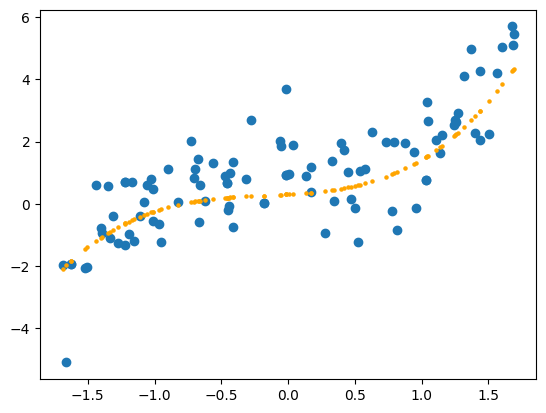

In [30]:
plt.scatter(x_random,y_random)
plt.scatter(x_random, y_random_pred, color = 'orange', s =5)
